# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1019]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
print("done")

done


### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [1020]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter=';')

In [1021]:
azdias.shape


(891221, 85)

In [1023]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print("shape:azdias*****")
print (azdias.shape)
print("shape:feat_info*****")
print (feat_info.shape)
print("azdias*****")
display (azdias.head (n=15))
print("feat_info*****")
display (feat_info.head (n=30))




shape:azdias*****
(891221, 85)
shape:feat_info*****
(85, 4)
azdias*****


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


feat_info*****


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [1024]:
feat_info["attribute"]
print(type(feat_info))

<class 'pandas.core.frame.DataFrame'>


In [1025]:
# Description of the datasets:
print("Description:azdias*****")
display (azdias.describe ())
print("Description:feat_info*****")
display (feat_info.describe ())

Description:azdias*****


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


Description:feat_info*****


,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,W_KEIT_KIND_HH,person,ordinal,[-1]
freq,1,43,49,26


In [1026]:
unique = feat_info["missing_or_unknown"].unique()
unique

array(['[-1,0]', '[-1,0,9]', '[0]', '[-1]', '[]', '[-1,9]', '[-1,X]',
       '[XX]', '[-1,XX]'], dtype=object)

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [1027]:
# Identify missing or unknown data values and convert them to NaNs.
natural_missing = azdias.isnull().sum () 
display (natural_missing)


AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [1028]:

# The total number of missing data on the dataset 
overall= azdias.isnull().sum () .sum()
display (overall)

4896838

In [1029]:
for indx in range(len(feat_info)):
    missing_or_unknown = feat_info.iloc[indx]['missing_or_unknown']
    missing_or_unknown = missing_or_unknown.strip('[')
    missing_or_unknown = missing_or_unknown.strip(']')
    missing_or_unknown = missing_or_unknown.split(sep=',')
    missing_or_unknown = [int(value) if (value!='X' and value!='XX' and value!='') else value for value in missing_or_unknown]
    if missing_or_unknown != ['']:
        azdias = azdias.replace({feat_info.iloc[indx]['attribute']: missing_or_unknown}, np.nan)
        
print("done")

done


In [1031]:
overall2 = azdias.isnull().sum ().sum()
display (overall2)

8373929

In [1032]:
azdias.shape


(891221, 85)

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [1033]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
percentage = (azdias.isnull().sum()/891221).sort_values(ascending=True)*100
display (percentage)

ZABEOTYP                  0.000000
SEMIO_TRADV               0.000000
SEMIO_PFLICHT             0.000000
SEMIO_KAEM                0.000000
SEMIO_DOM                 0.000000
SEMIO_KRIT                0.000000
SEMIO_RAT                 0.000000
SEMIO_KULT                0.000000
SEMIO_ERL                 0.000000
SEMIO_LUST                0.000000
SEMIO_VERT                0.000000
SEMIO_MAT                 0.000000
SEMIO_REL                 0.000000
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
FINANZ_VORSORGER          0.000000
ANREDE_KZ                 0.000000
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
GREEN_AVANTGARDE          0.000000
FINANZTYP                 0.000000
ALTERSKATEGORIE_GROB      0.323264
GFK_URLAUBERTYP           0.544646
LP_STATUS_GROB            0.544646
LP_STATUS_FEIN            0.544646
ONLINE_AFFINITAET   

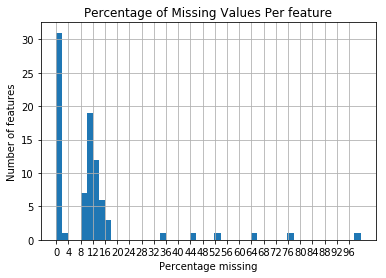

In [1034]:
# Investigate patterns in the amount of missing data in each column.

plt.hist(percentage,bins=50)
plt.title("Percentage of Missing Values Per feature");
plt.ylabel("Number of features");
plt.xlabel("Percentage missing");
plt.xticks(np.arange(0, 100, step=4))
plt.grid()


In [1035]:
azdias.shape


(891221, 85)

In [1036]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

outliers= []
for column in range(85):
    col= percentage.index[column]
    null_col = percentage[column]
    if null_col > 20:
        outliers.append(col)

print("The outliers list is: {}".format(outliers))
outliers

The outliers list is: ['ALTER_HH', 'GEBURTSJAHR', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'AGER_TYP', 'TITEL_KZ']


['ALTER_HH',
 'GEBURTSJAHR',
 'KBA05_BAUMAX',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'TITEL_KZ']

In [1037]:
# Drop the outliers:

azdias = azdias.drop(outliers,axis=1)
azdias.shape



(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

From the above Histogram, we can see that most of the columns have less than 20% of missing values. The percentage of the missing values variate between 0 and 16% for the most of features. Therefore, the 6 features that have more than 30% of missing values represent the outliers that were droped from our dataframe. The outliers are : 'ALTER_HH',
 'GEBURTSJAHR','KBA05_BAUMAX','KK_KUNDENTYP','AGER_TYP','TITEL_KZ'.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [1038]:
# How much data is missing in each row of the dataset?
missing_per_rows = azdias.isnull().sum(axis=1).sort_values(ascending=True)
missing_per_rows




445610     0
540274     0
540275     0
540277     0
540280     0
540281     0
540283     0
540284     0
540286     0
540273     0
540287     0
540290     0
540291     0
540292     0
540293     0
540295     0
540296     0
540298     0
540299     0
540289     0
540300     0
540271     0
540269     0
540239     0
540240     0
540241     0
540242     0
540243     0
540244     0
540246     0
          ..
139521    47
690887    47
690878    47
690876    47
690871    47
139478    47
139236    47
691118    47
691129    47
691317    47
139243    47
139245    47
139248    47
139250    47
139255    47
139267    47
691122    47
691212    47
139323    47
691197    47
139332    47
691183    47
691171    47
691142    47
691141    47
139316    47
183108    47
472919    48
732775    49
643174    49
Length: 891221, dtype: int64

In [1039]:
# The total number of missing per rows
total_missing_per_rows = azdias.isnull().sum(axis=1).sum()
total_missing_per_rows


5035304

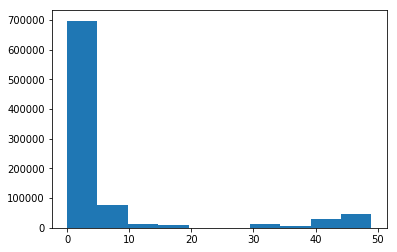

In [1040]:
# The hisogramm


missing_per_rows.hist(grid=False)


In [1041]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
first_subset = azdias[azdias.isnull().sum(axis=1) >= 20]
second_subset = azdias[azdias.isnull().sum(axis=1) < 20]


In [1044]:
zero_miss=[]
for i in range(79):
    if(percentage[i]==0):
        zero_miss.append(percentage.index[i])
zero_miss
len(zero_miss)


24

In [1045]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def comparing_distribution(column_name):
    fig = plt.figure(10, figsize=(12,4))
    
    ax1 = fig.add_subplot(121)
    ax1.title.set_text('more features ')
    sns.countplot(first_subset[column_name])
    
    ax2 = fig.add_subplot(122)
    ax2.title.set_text('few features ')
    sns.countplot(second_subset[column_name])
                                                       
    fig.suptitle(column)
    plt.show()


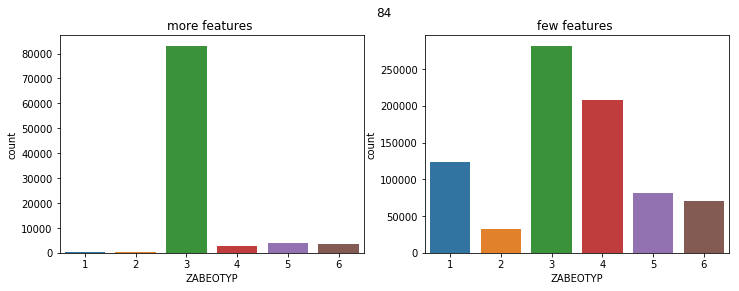

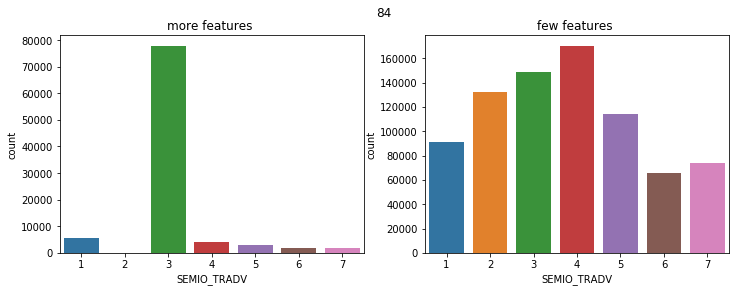

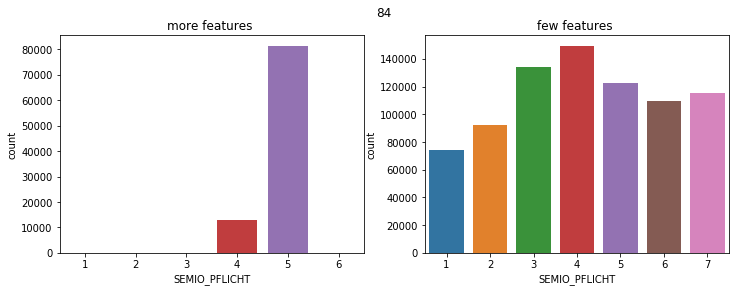

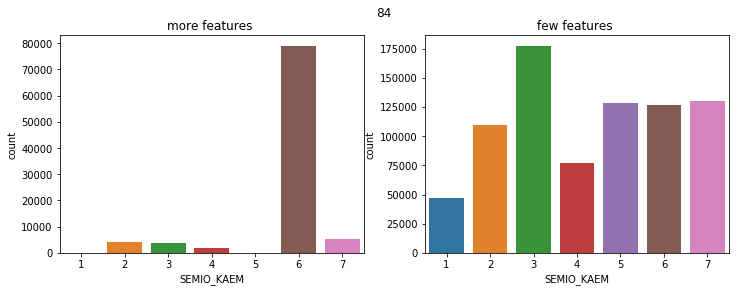

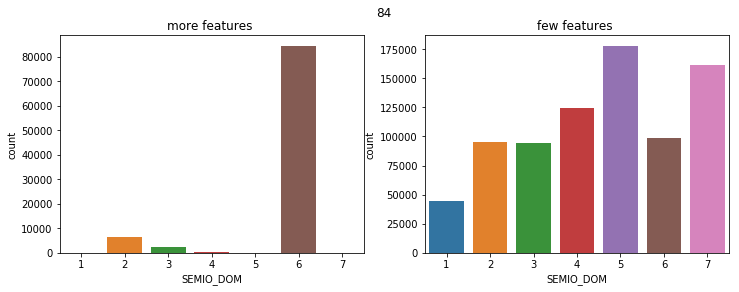

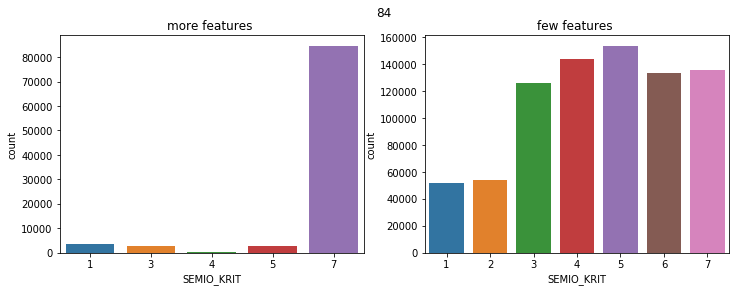

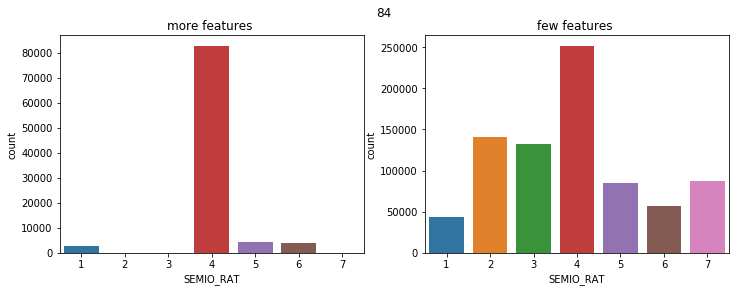

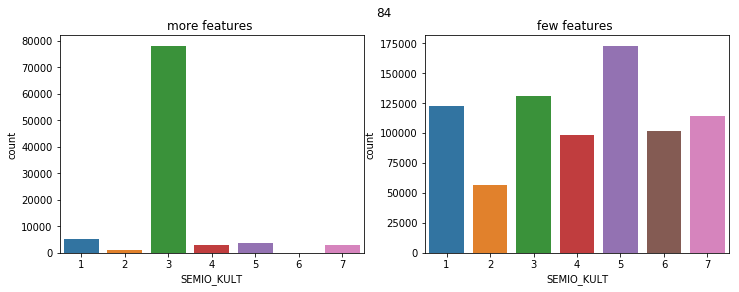

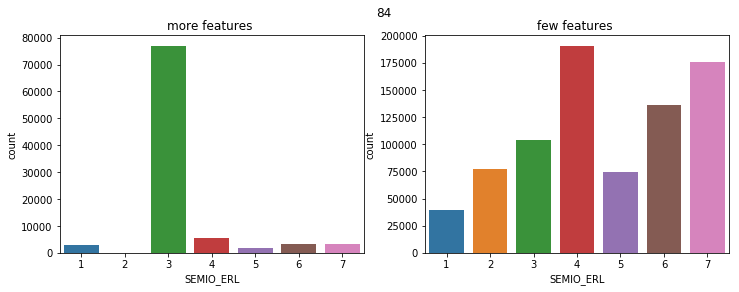

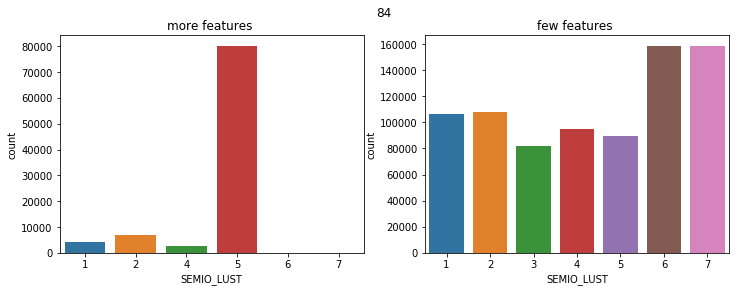

In [1046]:
for i in range(10):
    comparing_distribution(zero_miss[i])

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

The data above 20% of missing data("fisrt_subset") was ignored by us. We retained the data below 20% of missing data("second_subset"), that contains the majority of the data, with a shape with (797077, 79)

From the graphs we can see clearly that the data with lots of missing values are qualitatively different overall from the data with few or no missing values.



### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [1047]:
# How many features are there of each data type?
features = list(second_subset.columns)
feat_info_clean = feat_info[feat_info['attribute'].isin(features)]
data_type_count = feat_info_clean['type'].value_counts()
for i in range(len(data_type_count)):
    print('There are {} {} features.'.format(data_type_count[i], data_type_count.index[i]))


There are 49 ordinal features.
There are 18 categorical features.
There are 6 numeric features.
There are 6 mixed features.


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [1048]:
# New feat_info dataframe
'''
feat_info_new = feat_info.set_index("attribute")
feat_info_new
'''

'\nfeat_info_new = feat_info.set_index("attribute")\nfeat_info_new\n'

In [1049]:
# Delete the outliers features from feat_info:
'''['ALTER_HH',
 'GEBURTSJAHR',
 'KBA05_BAUMAX',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'TITEL_KZ']

feat_info_new = feat_info_new.drop("ALTER_HH", axis=0)
feat_info_new = feat_info_new.drop("GEBURTSJAHR", axis=0)
feat_info_new = feat_info_new.drop("KBA05_BAUMAX", axis=0)
feat_info_new = feat_info_new.drop("KK_KUNDENTYP", axis=0)
feat_info_new = feat_info_new.drop("AGER_TYP", axis=0)
feat_info_new = feat_info_new.drop("TITEL_KZ", axis=0)
print("done")
'''

'[\'ALTER_HH\',\n \'GEBURTSJAHR\',\n \'KBA05_BAUMAX\',\n \'KK_KUNDENTYP\',\n \'AGER_TYP\',\n \'TITEL_KZ\']\n\nfeat_info_new = feat_info_new.drop("ALTER_HH", axis=0)\nfeat_info_new = feat_info_new.drop("GEBURTSJAHR", axis=0)\nfeat_info_new = feat_info_new.drop("KBA05_BAUMAX", axis=0)\nfeat_info_new = feat_info_new.drop("KK_KUNDENTYP", axis=0)\nfeat_info_new = feat_info_new.drop("AGER_TYP", axis=0)\nfeat_info_new = feat_info_new.drop("TITEL_KZ", axis=0)\nprint("done")\n'

In [1050]:
'''
feat_info_neww = feat_info_new.reset_index()
feat_info_neww["attribute"]
'''

'\nfeat_info_neww = feat_info_new.reset_index()\nfeat_info_neww["attribute"]\n'

In [1051]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?




categorical_features = feat_info_clean[feat_info_clean.type=='categorical']

#categorical_features = feat_info_new[feat_info_new["type"]=="categorical"]["attribute"]
categorical_features

,attribute,information_level,type,missing_or_unknown
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]
21,NATIONALITAET_KZ,person,categorical,"[-1,0]"


In [1052]:
def isNanExist(unique_vals):
    for val in unique_vals:
        #print("val:::: ", val)
        if not isinstance(val, str) and np.isnan(val):
            return 1
    return 0

In [1053]:
multi_level = []
binary = []
for column in categorical_features["attribute"]:
    #nan_num = isNanExist(second_subset[column].unique())
    #if second_subset[column].nunique() - nan_num > 2:
    if second_subset[column].nunique() > 2:
        multi_level.append(column)
    else:
        binary.append(column)

nan_num = isNanExist(second_subset["VERS_TYP"].unique())
print("uni: ", second_subset["VERS_TYP"].unique())
print("nan_num:::: ", nan_num)
print(second_subset["VERS_TYP"].nunique() - nan_num)
print("ok")

uni:  [  2.   1.  nan]
nan_num::::  1
1
ok


In [1054]:
second_subset.shape

(797077, 79)

In [1055]:
print('Binary features are: {}'.format(binary))
print('Multi-level features are: {}'.format(multi_level))

Binary features are: ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
Multi-level features are: ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [1056]:
print(second_subset["VERS_TYP"].unique())
print(type(second_subset["VERS_TYP"].unique()))
vals = second_subset["VERS_TYP"].unique()
for val in vals:
    if np.isnan(val):
        print("remove it")

[  2.   1.  nan]
<class 'numpy.ndarray'>
remove it


In [1057]:
len(binary)

5

In [1058]:
len(multi_level)

13

In [1059]:
for col in binary:
    print(second_subset[col].value_counts())

2    415578
1    381499
Name: ANREDE_KZ, dtype: int64
0    621942
1    175135
Name: GREEN_AVANTGARDE, dtype: int64
0.0    790370
1.0      6707
Name: SOHO_KZ, dtype: int64
2.0    394116
1.0    366623
Name: VERS_TYP, dtype: int64
W    628695
O    168382
Name: OST_WEST_KZ, dtype: int64


In [1060]:
for col in multi_level:
    print(second_subset[col].value_counts())

4.0    198089
3.0    147068
2.0    141166
5.0    111032
6.0    101898
1.0     93192
Name: CJT_GESAMTTYP, dtype: int64
6    289004
1    196805
5    106220
2    104577
4     55874
3     44597
Name: FINANZTYP, dtype: int64
12.0    129983
10.0    102748
8.0      82992
11.0     75051
5.0      70468
4.0      60413
9.0      57046
3.0      53094
1.0      50640
2.0      43647
7.0      40642
6.0      25721
Name: GFK_URLAUBERTYP, dtype: int64
1.0     402248
10.0    128902
2.0      98491
11.0     48727
8.0      21777
7.0      19568
4.0      11573
5.0      11164
9.0      10451
6.0       8512
3.0       4682
Name: LP_FAMILIE_FEIN, dtype: int64
1.0    402248
5.0    188080
2.0     98491
4.0     49857
3.0     27419
Name: LP_FAMILIE_GROB, dtype: int64
1.0     206766
9.0     136229
10.0    111538
2.0     111016
4.0      73938
3.0      68893
6.0      28870
5.0      27472
8.0      18525
7.0       9198
Name: LP_STATUS_FEIN, dtype: int64
1.0    317782
2.0    170303
4.0    154754
5.0    111538
3.0     38068
Na

In [1061]:
print('Binary features are: {}'.format(binary))
print('Multi-level features are: {}'.format(multi_level))

Binary features are: ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
Multi-level features are: ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [1062]:
for feature in binary:
    print('Unique values for {} are {}'.format(feature, azdias[feature].unique()))

Unique values for ANREDE_KZ are [1 2]
Unique values for GREEN_AVANTGARDE are [0 1]
Unique values for SOHO_KZ are [ nan   1.   0.]
Unique values for VERS_TYP are [ nan   2.   1.]
Unique values for OST_WEST_KZ are [nan 'W' 'O']


In [1063]:
for feature in multi_level:
    print('Unique values for {} are {}'.format(feature, azdias[feature].unique()))

Unique values for CJT_GESAMTTYP are [  2.   5.   3.   4.   1.   6.  nan]
Unique values for FINANZTYP are [4 1 6 5 2 3]
Unique values for GFK_URLAUBERTYP are [ 10.   1.   5.  12.   9.   3.   8.  11.   4.   2.   7.   6.  nan]
Unique values for LP_FAMILIE_FEIN are [  2.   5.   1.  nan  10.   7.  11.   3.   8.   4.   6.   9.]
Unique values for LP_FAMILIE_GROB are [  2.   3.   1.  nan   5.   4.]
Unique values for LP_STATUS_FEIN are [  1.   2.   3.   9.   4.  10.   5.   8.   6.   7.  nan]
Unique values for LP_STATUS_GROB are [  1.   2.   4.   5.   3.  nan]
Unique values for NATIONALITAET_KZ are [ nan   1.   3.   2.]
Unique values for SHOPPER_TYP are [ nan   3.   2.   1.   0.]
Unique values for ZABEOTYP are [3 5 4 1 6 2]
Unique values for GEBAEUDETYP are [ nan   8.   1.   3.   2.   6.   4.   5.]
Unique values for CAMEO_DEUG_2015 are [nan '8' '4' '2' '6' '1' '9' '5' '7' '3']
Unique values for CAMEO_DEU_2015 are [nan '8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9

In [1064]:
len(multi_level)

13

In [1065]:
multi_level.append('OST_WEST_KZ')
len(multi_level)

14

In [1066]:
second_subset["OST_WEST_KZ"].unique()

array(['W', 'O'], dtype=object)

In [1067]:
# Re-encode categorical variable(s) to be kept in the analysis.

second_subset = pd.get_dummies(second_subset, columns=multi_level)


#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

After getting the categorical features and getting the binary and multi level features, we have just add the"OST_WEST_KZ" to the multi_level. Then we have directly hot encoded the multi_level features. 
So, overall we have hot encoded all the categorical features and have not deleted any features.



#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [1070]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
mixed_varibale = feat_info[feat_info.type=='mixed']
mixed_varibale["attribute"]
mixed_varibale

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


In [1071]:
def decadedim(x):
    if x in (1,2,3):
        return 1
    if x in (4,5,6):
        return 2
    if x in (7,8,9):
        return 3
    if x in (10,11,12):
        return 4
    if x in (13,14,15):
        return 5
    
    
def movementdim(x):
    if x in (2,4,6,7,9,11,13,15):
        return 0
    if x in (1,3,5,8,10,12,14):
        return 1

In [1072]:
#Crating two variable from PRAEGENDE_JUGENDJAHRE

second_subset['PRAEGENDE_JUGENDJAHRE_DECADE'] = second_subset['PRAEGENDE_JUGENDJAHRE'].apply(decadedim)
second_subset['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = second_subset['PRAEGENDE_JUGENDJAHRE'].apply(movementdim)
#Drop the "PRAEGENDE_JUGENDJAHRE" variable from second_subset
second_subset.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)

print("done")


done


In [1073]:
second_subset.shape

(797077, 196)

In [1074]:
second_subset['CAMEO_INTL_2015'].unique()

array(['51', '24', '12', '43', '54', '22', '14', '13', '15', '33', '41',
       '34', '55', nan, '25', '23', '31', '52', '35', '45', '44', '32'], dtype=object)

In [1075]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

wealth_dim = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,
               '31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

life_stage_dim = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,
                   '31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                   '51':1, '52':2, '53':3, '54':4, '55':5}



In [1076]:
second_subset['WEALTH'] = second_subset['CAMEO_INTL_2015']
second_subset['LIFE_STAGE'] = second_subset['CAMEO_INTL_2015']

In [1077]:
second_subset.shape

(797077, 198)

In [1078]:
second_subset['WEALTH'].replace(wealth_dim, inplace=True)
second_subset['LIFE_STAGE'].replace(life_stage_dim, inplace=True)

In [1079]:

second_subset.drop('CAMEO_INTL_2015', axis=1, inplace=True)


In [1080]:
second_subset['WEALTH']

1         5.0
2         2.0
3         1.0
4         4.0
5         5.0
6         2.0
7         1.0
8         1.0
9         1.0
10        5.0
12        4.0
13        3.0
15        4.0
16        4.0
18        2.0
19        3.0
20        2.0
21        5.0
22        5.0
23        4.0
25        3.0
26        NaN
27        5.0
28        1.0
29        1.0
31        5.0
32        1.0
33        4.0
34        2.0
36        4.0
         ... 
891191    4.0
891192    3.0
891193    4.0
891194    2.0
891195    5.0
891196    2.0
891197    2.0
891198    1.0
891199    5.0
891200    5.0
891201    4.0
891202    4.0
891203    2.0
891204    2.0
891205    3.0
891206    2.0
891207    4.0
891208    1.0
891209    5.0
891210    4.0
891211    5.0
891212    5.0
891213    3.0
891214    2.0
891215    3.0
891216    4.0
891217    5.0
891218    2.0
891219    5.0
891220    4.0
Name: WEALTH, Length: 797077, dtype: float64

#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

We have created the "PRAEGENDE_JUGENDJAHRE_DECADE", "PRAEGENDE_JUGENDJAHRE_MOVEMENT", "WEALTH", "LIFE_STAGE" from the "PRAEGENDE_JUGENDJAHRE", "CAMEO_INTL_2015". And deleted those ones after created the new features. 

Concerning the engineering steps:


    *for the "PRAEGENDE_JUGENDJAHRE_DECADE", "PRAEGENDE_JUGENDJAHRE_MOVEMENT":
 We have appliyed two functions decadedim and movementdim to creat the new features
 
 
    *for the "WEALTH", "LIFE_STAGE":
 We have directly creat two dictionneries "wealth_dim" and "life_stage_dim", are replace the old values with the values of this dictionnies

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [1081]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
second_subset.columns.values

array(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL',
       'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT',
       'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM',
       'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP',
       'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH',
       'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL',
       'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'WOHNLAGE', 'KBA05_ANTG1',
       'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ',
       'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK',
       'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW',
       'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', '

In [1083]:
second_subset.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,WEALTH,LIFE_STAGE
1,1.0,2,1,5,2,5,4,5,0,3.0,...,0,0,0,0,0,1,5.0,1.0,5.0,1.0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0,0,0,0,0,1,5.0,0.0,2.0,4.0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,0,0,0,0,0,1,3.0,1.0,1.0,2.0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,0,0,0,0,0,1,3.0,1.0,4.0,3.0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,0,0,0,0,0,1,1.0,1.0,5.0,4.0


In [1084]:
second_subset.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP',
       ...
       'CAMEO_DEU_2015_9B', 'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D',
       'CAMEO_DEU_2015_9E', 'OST_WEST_KZ_O', 'OST_WEST_KZ_W',
       'PRAEGENDE_JUGENDJAHRE_DECADE', 'PRAEGENDE_JUGENDJAHRE_MOVEMENT',
       'WEALTH', 'LIFE_STAGE'],
      dtype='object', length=197)

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [1085]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for indx in range(len(feat_info)):
        missing_or_unknown = feat_info.iloc[indx]['missing_or_unknown']
        missing_or_unknown = missing_or_unknown.strip('[')
        missing_or_unknown = missing_or_unknown.strip(']')
        missing_or_unknown = missing_or_unknown.split(sep=',')
        missing_or_unknown = [int(value) if (value!='X' and value!='XX' and value!='') 
                                         else value for value in missing_or_unknown]
        if missing_or_unknown != ['']:
            df = df.replace({feat_info.iloc[indx]['attribute']: missing_or_unknown}, np.nan)
    
    for col in df.columns:
        df = df.replace({col: ['XX', 'X']}, np.nan)
    # remove selected columns and rows, ...
    # drop columns with more than 20% missing values
    #outliers = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']

    null_values_per_feature =(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100
    
    outliers= []
    for column in range(85):
        col= percentage.index[column]
        null_col = percentage[column]
        if null_col > 20:
            outliers.append(col)

    print("The outliers list is: {}".format(outliers))
    
    print("1: ", df.shape)
    df_clean = df.drop(outliers, axis=1)
    print("2: ", df_clean.shape)
    

    f_subset = df_clean[df_clean.isnull().sum(axis=1) >= 20]
    s_subset2 = df_clean[df_clean.isnull().sum(axis=1) < 20]
    s_subset2 = s_subset2.fillna(s_subset2.mode().iloc[0])
    print("3: ", s_subset2.shape)

    print(s_subset2.shape)
    # select, re-encode, and engineer column values.
    

    
    feat_info_new = feat_info.set_index("attribute")
   

    feat_info_new = feat_info_new.drop("ALTER_HH", axis=0)
    feat_info_new = feat_info_new.drop("GEBURTSJAHR", axis=0)
    feat_info_new = feat_info_new.drop("KBA05_BAUMAX", axis=0)
    feat_info_new = feat_info_new.drop("KK_KUNDENTYP", axis=0)
    feat_info_new = feat_info_new.drop("AGER_TYP", axis=0)
    feat_info_new = feat_info_new.drop("TITEL_KZ", axis=0)


    feat_info_neww = feat_info_new.reset_index()
    

    categorical_features = feat_info_neww[feat_info_neww["type"]=="categorical"]
    #categorical_features = feat_info_neww[feat_info_neww.type=='categorical']
    '''
    multi_level = []
    binary = []
    
    
        
    for column in categorical_features["attribute"]:
        nan_num = isNanExist(s_subset2[column].unique())
        if s_subset2[column].nunique() - nan_num > 2:
             multi_level.append(column)
        else:
             binary.append(column)
                
    nan_num = isNanExist(s_subset2["VERS_TYP"].unique())
    print("uni: ", s_subset2["VERS_TYP"].unique())
    print("nan_num:::: ", nan_num)
    print(s_subset2["VERS_TYP"].nunique() - nan_num)
    '''
                
    print("multi_level::::: ", multi_level)
    print(s_subset2["VERS_TYP"].unique())
    #for col in binary:
            
          #  print(s_subset2[col].value_counts())

    multi_level.append("OST_WEST_KZ")

    print("4: ", s_subset2.shape, " levels: ", len(multi_level))
    s_subset2 = pd.get_dummies(s_subset2, columns=multi_level)
    print("5: ", s_subset2.shape)
    
    
    s_subset2['PRAEGENDE_JUGENDJAHRE_DECADE'] = s_subset2['PRAEGENDE_JUGENDJAHRE'].apply(decadedim)

    s_subset2['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = s_subset2['PRAEGENDE_JUGENDJAHRE'].apply(movementdim)
    print("6: ", s_subset2.shape)
    s_subset2.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)
    
    print("7: ", s_subset2.shape)
    s_subset2['WEALTH'] = s_subset2['CAMEO_INTL_2015']
    s_subset2['LIFE_STAGE'] = s_subset2['CAMEO_INTL_2015']
    
    s_subset2['WEALTH'].replace(wealth_dim, inplace=True)
    s_subset2['LIFE_STAGE'].replace(life_stage_dim, inplace=True)
    print("8: ", s_subset2.shape)
    
    s_subset2.drop('CAMEO_INTL_2015', axis=1, inplace=True)
    #s_subset2['CAMEO_INTL_2015_WEALTH'] = s_subset2['CAMEO_INTL_2015'].apply(wealth_dim)
    #s_subset2['CAMEO_INTL_2015_LIFE_STAGE'] = s_subset2['CAMEO_INTL_2015'].apply(life_stage_dim)
    #s_subset2.drop('CAMEO_INTL_2015', axis=1, inplace=True)
    print("9: ", s_subset2.shape)

    print(s_subset2.shape)   
    # Return the cleaned dataframe.
  
  
    
    return s_subset2
    
    
    
print("doone")
    

doone


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [958]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [959]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

fill_missing = Imputer(strategy='most_frequent')
second_subset_clean = pd.DataFrame(fill_missing.fit_transform(second_subset))
print("done")

done


In [960]:
second_subset_clean.columns = second_subset.columns
second_subset_clean.index = second_subset.index
print("done")

done


In [961]:
second_subset_clean.isnull().sum().sum()


0

In [962]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler() 
second_subset_scaled = scaler.fit_transform(second_subset_clean)
print("done")


done


In [963]:
second_subset_scaled  = pd.DataFrame(second_subset_scaled , columns=list(second_subset_clean))
second_subset_scaled.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,WEALTH,LIFE_STAGE
0,-1.766173,0.958121,-1.494463,1.538139,-1.040664,1.466401,0.959974,1.338532,-0.530654,1.010291,...,-0.189607,-0.179893,-0.192884,-0.089706,-0.517521,0.517521,1.130720,0.530654,1.175857,-1.249369
1,0.200733,0.958121,-1.494463,0.864753,-1.766903,-0.570914,0.245238,1.338532,1.884467,1.010291,...,-0.189607,-0.179893,-0.192884,-0.089706,-0.517521,0.517521,1.130720,-1.884467,-0.869590,0.766691
2,1.184186,0.958121,0.683285,-0.482020,1.138052,-0.570914,-1.184235,-0.792444,-0.530654,-0.311793,...,-0.189607,-0.179893,-0.192884,-0.089706,-0.517521,0.517521,-0.341924,0.530654,-1.551406,-0.577349
3,0.200733,-1.043709,0.683285,0.191366,0.411813,-1.250019,0.245238,-0.792444,-0.530654,1.010291,...,-0.189607,-0.179893,-0.192884,-0.089706,-0.517521,0.517521,-0.341924,0.530654,0.494041,0.094671
4,-1.766173,0.958121,-0.042631,-1.155407,1.138052,-0.570914,-0.469499,1.338532,-0.530654,1.010291,...,-0.189607,-0.179893,-0.192884,-0.089706,-0.517521,0.517521,-1.814569,0.530654,1.175857,0.766691
5,-0.782720,0.958121,-1.494463,1.538139,-1.766903,1.466401,0.959974,-0.082119,-0.530654,-0.311793,...,-0.189607,-0.179893,-0.192884,-0.089706,-0.517521,0.517521,0.394398,0.530654,-0.869590,-0.577349
6,-1.766173,-1.043709,-0.042631,0.191366,0.411813,-1.250019,0.245238,-0.792444,-0.530654,-1.633876,...,-0.189607,-0.179893,-0.192884,-0.089706,-0.517521,0.517521,-0.341924,0.530654,-1.551406,0.766691
7,0.200733,-1.043709,0.683285,0.864753,-1.040664,0.787296,-0.469499,-0.792444,1.884467,1.010291,...,-0.189607,-0.179893,-0.192884,-0.089706,-0.517521,0.517521,0.394398,-1.884467,-1.551406,0.094671
8,0.200733,0.958121,-0.768547,0.864753,-1.040664,0.108191,1.674710,0.628207,1.884467,-0.311793,...,-0.189607,-0.179893,-0.192884,-0.089706,-0.517521,0.517521,1.130720,-1.884467,-1.551406,1.438711
9,0.200733,0.958121,-0.768547,-0.482020,1.138052,0.108191,-1.184235,1.338532,-0.530654,-0.311793,...,-0.189607,-0.179893,5.184457,-0.089706,-0.517521,0.517521,-1.814569,0.530654,1.175857,-1.249369


### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

We imputed the missing values using Imputer package that replaces the missing value with the "most_frequent" of the column. Then we have insured that there still no missing values with: second_subset_clean.isnull().sum().sum()

https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html

Then we standardized the data using StandardScaler package, to get the data in the same scall

To bring the data to same scale for comparison we standardized the data using StandardScaler package

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [964]:
second_subset_scaled.shape

(797077, 197)

In [965]:
# Apply PCA to the data.
pca = PCA()
pca.fit(second_subset_scaled)
print("done")

done


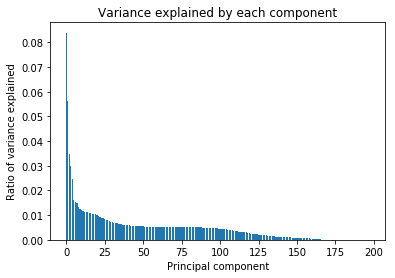

In [134]:
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()



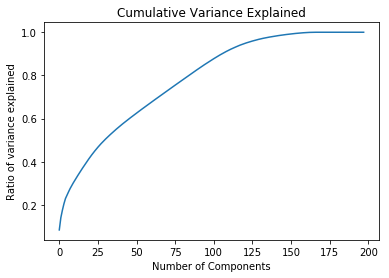

In [135]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of variance explained")
plt.show()

In [136]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca_second_subset= PCA(n_components=100)
second_subset_scaled_pca = pca_second_subset.fit_transform(second_subset_scaled)

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [137]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def weights(pca, i):
    df = pd.DataFrame(pca.components_, columns=list(second_subset_scaled.columns))
    weights = df.iloc[i].sort_values(ascending=False)
    return weights
print("done")

done


In [138]:
pca_weight_0 = weights(pca_second_subset, 0)
print (pca_weight_0)

LP_STATUS_GROB_1.0                0.186124
WEALTH                            0.182243
CAMEO_INTL_2015                   0.179323
HH_EINKOMMEN_SCORE                0.179019
PLZ8_ANTG3                        0.176322
PLZ8_ANTG4                        0.170749
PLZ8_BAUMAX                       0.167600
ORTSGR_KLS9                       0.149780
EWDICHTE                          0.147691
FINANZ_HAUSBAUER                  0.145843
LP_STATUS_FEIN_1.0                0.124961
KBA05_ANTG4                       0.124960
PLZ8_ANTG2                        0.120882
KBA05_ANTG3                       0.112522
ANZ_HAUSHALTE_AKTIV               0.112182
ARBEIT                            0.111552
CAMEO_DEUG_2015_9                 0.110228
LP_STATUS_FEIN_2.0                0.105014
RELAT_AB                          0.104172
PRAEGENDE_JUGENDJAHRE_MOVEMENT    0.100179
FINANZTYP_1                       0.099299
FINANZ_SPARER                     0.096792
LP_FAMILIE_GROB_1.0               0.095971
LP_FAMILIE_

In [139]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weight_1 = weights(pca_second_subset, 1)
print (pca_weight_1)


ALTERSKATEGORIE_GROB            0.238442
FINANZ_VORSORGER                0.224129
ZABEOTYP_3                      0.199468
SEMIO_ERL                       0.181781
SEMIO_LUST                      0.165729
RETOURTYP_BK_S                  0.154599
W_KEIT_KIND_HH                  0.120091
CJT_GESAMTTYP_2.0               0.111598
FINANZ_MINIMALIST               0.104532
FINANZTYP_2                     0.097540
FINANZTYP_5                     0.096727
LP_STATUS_FEIN_1.0              0.085201
SHOPPER_TYP_3.0                 0.076107
NATIONALITAET_KZ_1.0            0.073423
FINANZ_HAUSBAUER                0.072652
CJT_GESAMTTYP_1.0               0.071912
FINANZTYP_6                     0.071091
SEMIO_KRIT                      0.070259
WOHNDAUER_2008                  0.057568
GFK_URLAUBERTYP_4.0             0.057458
LP_FAMILIE_GROB_1.0             0.056289
LP_FAMILIE_FEIN_1.0             0.056289
SEMIO_KAEM                      0.052134
EWDICHTE                        0.049781
LP_STATUS_FEIN_3

In [140]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weight_2 = weights(pca_second_subset, 2)
print (pca_weight_2)


SEMIO_VERT                        0.314132
SEMIO_FAM                         0.254443
SEMIO_SOZ                         0.253730
SEMIO_KULT                        0.246180
FINANZTYP_5                       0.137495
FINANZ_MINIMALIST                 0.131051
ZABEOTYP_1                        0.121505
SHOPPER_TYP_0.0                   0.120264
SEMIO_REL                         0.109919
GREEN_AVANTGARDE                  0.091678
SEMIO_MAT                         0.087137
ORTSGR_KLS9                       0.076057
EWDICHTE                          0.075241
RETOURTYP_BK_S                    0.072534
LP_STATUS_GROB_5.0                0.067177
LP_STATUS_FEIN_10.0               0.067177
PLZ8_BAUMAX                       0.057644
PLZ8_ANTG4                        0.055681
PLZ8_ANTG3                        0.055309
SHOPPER_TYP_1.0                   0.051183
LP_STATUS_FEIN_3.0                0.046749
FINANZ_VORSORGER                  0.045765
ZABEOTYP_6                        0.045652
W_KEIT_KIND

In [141]:
# Map weights for the fourth principal component to corresponding feature names
# and then print the linked values, sorted by weight.


pca_weight_3 = weights(pca_second_subset, 3)
print (pca_weight_3)

LP_LEBENSPHASE_GROB               0.235823
LP_LEBENSPHASE_FEIN               0.229852
ANZ_PERSONEN                      0.210619
LP_FAMILIE_GROB_5.0               0.205158
GREEN_AVANTGARDE                  0.200414
ORTSGR_KLS9                       0.187326
EWDICHTE                          0.186186
LP_STATUS_FEIN_10.0               0.171522
LP_STATUS_GROB_5.0                0.171522
LP_FAMILIE_FEIN_10.0              0.154113
SEMIO_DOM                         0.132829
SEMIO_KAEM                        0.131648
ONLINE_AFFINITAET                 0.129910
PLZ8_ANTG3                        0.110470
LP_FAMILIE_FEIN_11.0              0.108547
PLZ8_ANTG4                        0.107754
ANREDE_KZ                         0.101688
PLZ8_BAUMAX                       0.095360
RELAT_AB                          0.091110
PLZ8_ANTG2                        0.081559
ZABEOTYP_2                        0.080904
ARBEIT                            0.075528
CAMEO_DEUG_2015_1                 0.070572
LP_FAMILIE_

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)


 
 
***From the first component:
"LP_STATUS_GROB_1.0 " that represents  the Social status is strongly and positively  correlated with the first component.
The increase of "MOBI_REGIO" that represent the Movement patterns cause the deacrease of the first component



***From the Second  component:
"ALTERSKATEGORIE_GROB" that represents  the Estimated age based on given name analysisis strongly and positively  correlated with the Second  component.
The increase of "PRAEGENDE_JUGENDJAHRE_DECADE" that represent the Dominating movement of person cause the deacrease of the Second  component

***From the Third component:
"SEMIO_VERT" that represents  the Personality typology is strongly and positively  correlated with the Third component.
The increase of "FINANZ_SPARER" that represent the Financial typology  cause the deacrease of the Third component

***From the Fourth  component:
"LP_LEBENSPHASE_GROB" that represents  the Life stage is strongly and positively  correlated with the Fourth  component.
The increase of "PRAEGENDE_JUGENDJAHRE_DECADE" that represent the Family type cause the deacrease of the Fourth  component






## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [142]:
#def kms(df, cl):
 #   kmeans = KMeans(cls = cl)
  #  model = kmeans.fit(df)
   # score = np.abs(model.score(df))
    #return score
    
def k_mean_score(data, n_cluster):
    kmeans = KMeans(n_clusters = n_cluster)
    model = kmeans.fit(data)
    score = np.abs(model.score(data))
    return score

In [143]:

from time import time

print("ok")


ok


In [144]:
# Over a number of different cluster counts...


    # run k-means clustering on the data and...
    
    
    # compute the average within-cluster distances.
#scr = []
#cls = list(range(1,20))
#for cl in cls:
 #   scr.append(kms(second_subset_scaled_pca, cl))    

start = time()
print("start!!")
scores = []
ks = list(range(1,20))
count = 1
for k in ks:
    print(count)
    count += 1
    score = k_mean_score(second_subset_scaled_pca, k)
    scores.append(score)

    
end = time()
print(end - start)
print("done")

start!!
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
4789.945041418076
done


Text(0,0.5,'SSE')

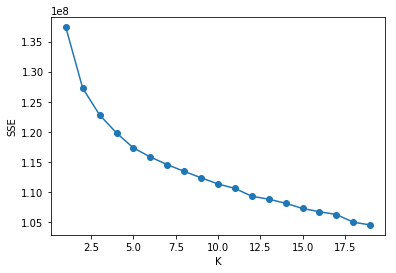

In [145]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.plot(ks, scores, linestyle='-', marker='o')
plt.xlabel('K')
plt.ylabel('SSE')


In [146]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
start = time()
print("start!!")
kmeans = KMeans(n_clusters =18)
model_18 = kmeans.fit(second_subset_scaled_pca)
second_subset_pred = model_18.predict(second_subset_scaled_pca)
end = time()
print(end - start)
print("done!")

start!!
425.46327328681946
done!


### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

From the The Elbow Curve method,We have choose to segment our data into 18 clusters. We have seen that the marginal drop in distance is diminishing or depicts closer difference in distances at around 18. This method is helpful because it shows how increasing the number of the clusters contribute separating the clusters in a meaningful way, not in a marginal way.

https://towardsdatascience.com/10-tips-for-choosing-the-optimal-number-of-clusters-277e93d72d92

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [1087]:
# Load in the customer demographics data.
customers = customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',delimiter=';')


customers.shape

(191652, 85)

In [1088]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_clean = clean_data(customers)





The outliers list is: ['ALTER_HH', 'GEBURTSJAHR', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'AGER_TYP', 'TITEL_KZ']
1:  (191652, 85)
2:  (191652, 79)
3:  (141590, 79)
(141590, 79)
multi_level:::::  ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'OST_WEST_KZ']
[ 1.  2.]
4:  (141590, 79)  levels:  15
5:  (141590, 196)
6:  (141590, 198)
7:  (141590, 197)
8:  (141590, 199)
9:  (141590, 198)
(141590, 198)


In [1094]:


to_delete = []
for col in customers_clean.columns:
    if not col in second_subset.columns:
        print("collllll: ", col)
        #to_delete.append(col)

print("another") 
to_delete = []
for col in second_subset.columns:
    if not col in customers_clean.columns:
        print("collllll2: ", col)
        #to_delete.append(col)

#customers_clean = customers_clean.drop(to_delete,axis=1)

print(len(customers_clean.columns))
print(len(second_subset.columns))

print(customers_clean.head(2))
print("------------")
print(second_subset.head(2))

another
collllll2:  GEBAEUDETYP_5.0
198
197
   ALTERSKATEGORIE_GROB  ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
0                   4.0          1                  5              1   
2                   4.0          2                  5              1   

   FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  \
0                 5               1                      2                 2   
2                 5               1                      4                 4   

   GREEN_AVANTGARDE  HEALTH_TYP     ...      CAMEO_DEU_2015_9D  \
0                 1         1.0     ...                      0   
2                 1         2.0     ...                      0   

   CAMEO_DEU_2015_9E  OST_WEST_KZ_O  OST_WEST_KZ_W  OST_WEST_KZ_O  \
0                  0              0              1              0   
2                  0              0              1              0   

   OST_WEST_KZ_W  PRAEGENDE_JUGENDJAHRE_DECADE  \
0              1                         

In [1093]:
'''
intersection_cols = second_subset.columns & customers_clean.columns
tmp_subset = second_subset[intersection_cols]
tmp_customers_clean = customers_clean[intersection_cols]
print(len(tmp_subset.columns))
print(len(tmp_customers_clean.columns))
'''
list(set(customers_clean.columns)-set(second_subset.columns))

[]

In [ ]:
Binary features are: ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'NATIONALITAET_KZ', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
Multi-level features are: ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP',
                           'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN',
                           'LP_STATUS_GROB', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP',
                           'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']

In [1096]:
fill_missing = Imputer(strategy='most_frequent')
customers_clean2= pd.DataFrame(fill_missing.fit_transform(customers_clean))


print("done")
scaler = StandardScaler() 
customers_clean_scaled = scaler.fit_transform(customers_clean2)

customers_clean_scaled = pd.DataFrame(customers_clean_scaled, columns=list(customers_clean2))
# PCA transformation
customers_pca = pca_second_subset.transform(customers_clean_scaled)

done


In [1099]:
customers_pred = model_18.predict(customers_pca)


(141590,)

In [974]:
print(tmp_customers_clean["LIFE_STAGE"].unique())
print(tmp_customers_clean["WEALTH"].unique())

[3 4 1 5 2]
[1 3 2 4 5]


In [975]:
tmp_customers_clean.dtypes.unique()



array([dtype('int64'), dtype('float64')], dtype=object)

In [977]:
customers_clean2.index = customers_clean.index

In [978]:
customers_clean2.isnull().sum().sum()

0

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

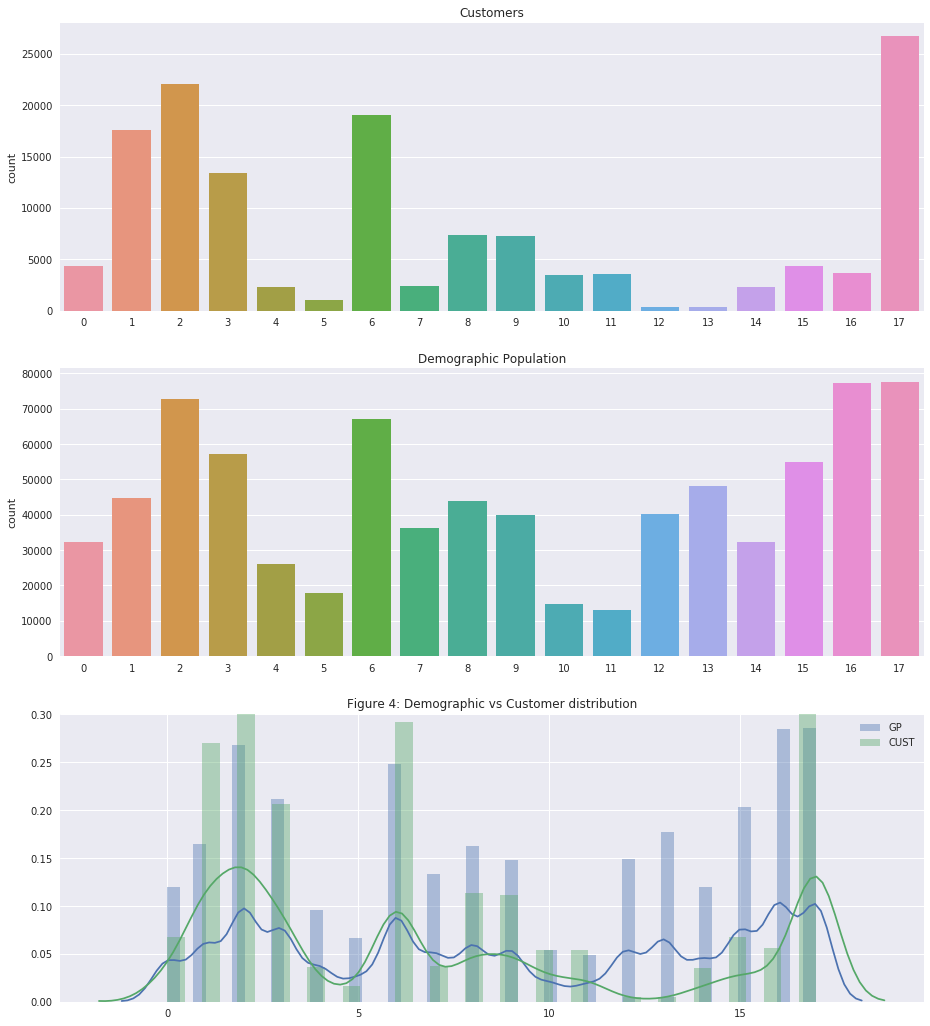

In [1104]:

fig = plt.figure()
ax=fig.add_axes([0,0,2,1], title='Figure 4: Demographic vs Customer distribution')
ax2=fig.add_axes([0,1.2,2,1], title='Demographic Population')
ax3=fig.add_axes([0,2.4,2,1], title='Customers')
sns.set(style="darkgrid")
sns.distplot(second_subset_pred, label='GP',ax=ax)
sns.distplot(customers_pred, label='CUST', ax=ax)
sns.countplot(second_subset_pred, label='GP', ax=ax2)
sns.countplot(customers_pred, label='CUST', ax=ax3)
ax.legend();

In [1110]:

cust = pd.DataFrame(customers_pred,columns=['Cluster']).reset_index().groupby('Cluster').count()/len(customers_pred)*100
gp= pd.DataFrame(second_subset_pred,columns=['Cluster']).reset_index().groupby('Cluster').count()/len(second_subset_pred)*100
dif = (cust-gp)
dif.rename_axis({'index':'diffrence'}, axis=1, inplace=True)
cust.rename_axis({'index':'Cust'}, axis=1, inplace=True)
gp.rename_axis({'index':'gp'}, axis=1, inplace=True)
dif = dif.join(cust).join(gp).sort_values('diffrence',ascending=False)
dif.fillna(0, inplace=True)
dif

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  if __name__ == '__main__':


,diffrence,Cust,gp
Cluster,,,
17,9.126822,18.859383,9.732560
1,6.811933,12.411893,5.599961
2,6.426479,15.551946,9.125467
6,4.985932,13.417614,8.431682
3,2.308764,9.495021,7.186257
11,0.861160,2.504414,1.643254
10,0.630806,2.468395,1.837589
9,0.099889,5.123243,5.023354
8,-0.293700,5.228477,5.522177


In [1125]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
# proportion of data in each cluster for the general population.
centroid_17 = scaler.inverse_transform(pca_second_subset.inverse_transform(model_18.cluster_centers_[17]))
centroid_1 = scaler.inverse_transform(pca_second_subset.inverse_transform(model_18.cluster_centers_[1]))
centroid_2 = scaler.inverse_transform(pca_second_subset.inverse_transform(model_18.cluster_centers_[17]))


In [1126]:
overrepresented1 = pd.Series(data = centroid_17, index = customers_clean.columns)
overrepresented2 = pd.Series(data = centroid_1, index = customers_clean.columns)
overrepresented3 = pd.Series(data = centroid_2, index = customers_clean.columns)


In [1140]:
clu17=overrepresented1.sort_values(ascending=True)
clu1=overrepresented2.sort_values(ascending=False)
clu2=overrepresented3.sort_values(ascending=False)


In [1146]:
print(overrepresented1.head(10))
print("*******")
print(overrepresented2.head(10))
print("*******")
print(overrepresented3.head(10))

ALTERSKATEGORIE_GROB     2.766850
ANREDE_KZ                1.762032
FINANZ_MINIMALIST        2.785031
FINANZ_SPARER            2.438197
FINANZ_VORSORGER         3.781905
FINANZ_ANLEGER           2.654784
FINANZ_UNAUFFAELLIGER    2.703848
FINANZ_HAUSBAUER         3.914830
GREEN_AVANTGARDE         0.273781
HEALTH_TYP               2.076170
dtype: float64
*******
ALTERSKATEGORIE_GROB     3.932956
ANREDE_KZ                1.292577
FINANZ_MINIMALIST        5.391113
FINANZ_SPARER            0.747725
FINANZ_VORSORGER         5.102969
FINANZ_ANLEGER           0.772573
FINANZ_UNAUFFAELLIGER    1.461928
FINANZ_HAUSBAUER         1.922518
GREEN_AVANTGARDE         1.425056
HEALTH_TYP               1.801943
dtype: float64
*******
ALTERSKATEGORIE_GROB     3.715951
ANREDE_KZ                1.314596
FINANZ_MINIMALIST        5.313767
FINANZ_SPARER            1.024417
FINANZ_VORSORGER         4.815670
FINANZ_ANLEGER           1.139782
FINANZ_UNAUFFAELLIGER    1.697988
FINANZ_HAUSBAUER         1.580667
GR

In [1128]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid_16 = scaler.inverse_transform(pca_second_subset.inverse_transform(model_18.cluster_centers_[16]))
centroid_13 = scaler.inverse_transform(pca_second_subset.inverse_transform(model_18.cluster_centers_[13]))
centroid_12 = scaler.inverse_transform(pca_second_subset.inverse_transform(model_18.cluster_centers_[12]))


In [1136]:
underrepresented1 = pd.Series(data = centroid_16, index = customers_clean.columns)
underrepresented2 = pd.Series(data = centroid_13, index = customers_clean.columns)
underrepresented3 = pd.Series(data = centroid_12, index = customers_clean.columns)


In [1137]:
clu16=underrepresented1.sort_values(ascending=False)
clu13=underrepresented2.sort_values(ascending=False)
clu12=underrepresented3.sort_values(ascending=False)

In [1150]:
print(underrepresented1.head(10))
print("*******")
print(underrepresented2.head(10))
print("*******")
print(underrepresented3.head(10))

ALTERSKATEGORIE_GROB     2.766850
ANREDE_KZ                1.762032
FINANZ_MINIMALIST        2.785031
FINANZ_SPARER            2.438197
FINANZ_VORSORGER         3.781905
FINANZ_ANLEGER           2.654784
FINANZ_UNAUFFAELLIGER    2.703848
FINANZ_HAUSBAUER         3.914830
GREEN_AVANTGARDE         0.273781
HEALTH_TYP               2.076170
dtype: float64
*******
ALTERSKATEGORIE_GROB     3.932956
ANREDE_KZ                1.292577
FINANZ_MINIMALIST        5.391113
FINANZ_SPARER            0.747725
FINANZ_VORSORGER         5.102969
FINANZ_ANLEGER           0.772573
FINANZ_UNAUFFAELLIGER    1.461928
FINANZ_HAUSBAUER         1.922518
GREEN_AVANTGARDE         1.425056
HEALTH_TYP               1.801943
dtype: float64
*******
ALTERSKATEGORIE_GROB     3.715951
ANREDE_KZ                1.314596
FINANZ_MINIMALIST        5.313767
FINANZ_SPARER            1.024417
FINANZ_VORSORGER         4.815670
FINANZ_ANLEGER           1.139782
FINANZ_UNAUFFAELLIGER    1.697988
FINANZ_HAUSBAUER         1.580667
GR

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)




From the above plots and table, we can clearly see that the clusters 17, 1 and 2 are significantly hiher when comparing the customers and general population data. The cluster that overrepresented the customers data is the cluster 17. The majority of peapole in this cluster have this caracteristics:
male,
45 years old and above ,
High financial typology,
Money savers 
Not member in the environmental sustainability 
Sanitary affine

From the above plots and table, we can clearly see that the clusters 16, 13 and 12 are significantly lower when comparing the customers and general population data. The cluster that underrepresented the customers data is the cluster 16 . 


> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.

In [1151]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook Identify_Customer_Segments.ipynb to html',
 '[NbConvertApp] Writing 874949 bytes to Identify_Customer_Segments.html']